In [136]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [140]:
T_dict = pd.read_csv("data/COVID-19/data_tables/testing_data/tests_combined_total_source.csv")
T = pd.read_csv("data/COVID-19/data_tables/testing_data/time_series_covid19_US.csv")[['date', 'state', 'tests_viral_total', 'people_viral_total']]

In [141]:
T = T.apply(lambda row: convert_time(row), axis=1).sort_values(by=['date','state'])

In [142]:
T[(T.state == "CT")]

def convert_time_cumul_test(row):
    row.date = datetime.datetime.strptime(row.date, '%m/%d/%y').strftime('%Y-%m-%d')
    return row

,date,state,tests_viral_total,people_viral_total
2676,2020-02-29,CT,3.0,NaN
2677,2020-03-01,CT,4.0,NaN
2678,2020-03-02,CT,8.0,NaN
2679,2020-03-03,CT,12.0,NaN
2680,2020-03-04,CT,24.0,NaN
...,...,...,...,...
3060,2021-03-19,CT,6877464.0,NaN
3061,2021-03-20,CT,6877464.0,NaN
3062,2021-03-21,CT,6877464.0,NaN
3063,2021-03-22,CT,6952641.0,NaN


In [143]:
def get_daily_tests(state, start, end):
    window_T = T[(T.date >= start) & (T.date <= end)]
    return window_T.loc[window_T.state == state, 'tests_viral_total'].diff()

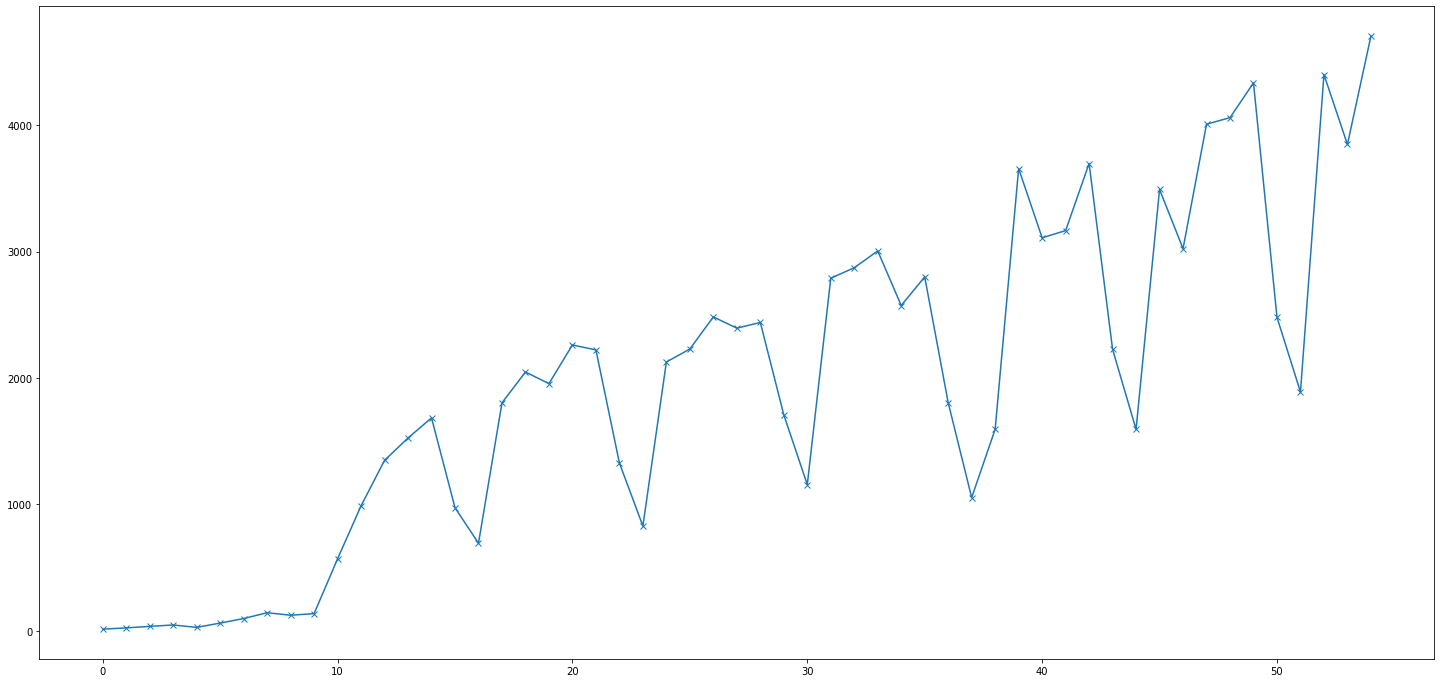

In [155]:
fig = plt.figure(figsize=(25, 12))
plt.plot(get_daily_tests("CT", "2020-03-06", "2020-04-30")[1:].to_numpy(), marker="x")